# Analysing Data with Pandas

Pandas is a powerful tool for analysing data. There is no chance of covering all possibilities with pandas in a few notebooks. We will focus on basics. 

We will extract from a given data base that contains information of a commander deck information such as: Card Type -, Color Distribution and Mana Curve

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import of Data

with open('../data/mtg_cards_data/AllDeckFiles/NecronDynasties_40K.json') as f:
    data = json.load(f)
data = data['data']['mainBoard']

deck_cards = pd.json_normalize(data,max_level=1)

In [3]:
deck_cards.head(5)

artist availability borderColor colorIdentity colors  \
0         Rafater      [paper]       black           [B]    [B]   
1         L J Koh      [paper]       black           [B]    [B]   
2  Games Workshop      [paper]       black           [B]    [B]   
3         L J Koh      [paper]       black           [B]    [B]   
4    Stanton Feng      [paper]       black           [B]    [B]   

   convertedManaCost  count  edhrecRank  edhrecSaltiness   finishes  ...  \
0                5.0      1      2171.0             0.20  [nonfoil]  ...   
1                5.0      1       479.0             0.74  [nonfoil]  ...   
2                4.0      1      1412.0             0.32  [nonfoil]  ...   
3                4.0      1       606.0             0.23  [nonfoil]  ...   
4                1.0      1       918.0             0.13  [nonfoil]  ...   

  isAlternative frameEffects power  toughness  identifiers.cardKingdomFoilId  \
0           NaN          NaN   NaN        NaN                            NaN   
1           NaN          NaN   NaN        NaN                            NaN   
2           NaN          NaN   NaN        NaN                            NaN   
3           NaN          NaN   NaN        NaN                            NaN   
4           NaN          NaN   NaN        NaN                            NaN   

   leadershipSkills.brawl leadershipSkills.commander  \
0                     NaN                        NaN   
1                     NaN                        NaN   
2                     NaN                        NaN   
3                     NaN                        NaN   
4                     NaN                        NaN   

  leadershipSkills.oathbreaker purchaseUrls.cardKingdomFoil isStarter  
0                          NaN                          NaN       NaN  
1                          NaN                          NaN       NaN  
2                          NaN                          NaN       NaN  
3                          NaN                          NaN       NaN  
4                          NaN                          NaN       NaN  

[5 rows x 79 columns]

In [4]:
deck_cards[['name','colorIdentity','colors','types','convertedManaCost','count']].head(5)

name colorIdentity colors      types  convertedManaCost  count
0  Beacon of Unrest           [B]    [B]  [Sorcery]                5.0      1
1      Living Death           [B]    [B]  [Sorcery]                5.0      1
2          Mutilate           [B]    [B]  [Sorcery]                4.0      1
3      Dread Return           [B]    [B]  [Sorcery]                4.0      1
4            Defile           [B]    [B]  [Instant]                1.0      1

In [5]:
db = deck_cards[['types','count']].explode('types').groupby('types',as_index=False).sum()
db

types  count
0     Artifact     49
1     Creature     29
2  Enchantment      3
3      Instant      3
4         Land     37
5      Sorcery      6

In [6]:
db1 = deck_cards[ deck_cards.apply(lambda x: False if ' '.join(x.types).count('Land') else True,axis=1) ]  # exclude Land cards
db1 = db1[['colorIdentity','count']].explode('colorIdentity').fillna('N').groupby('colorIdentity', as_index=False).sum()
db1

colorIdentity  count
0             B     37
1             N     25

In [7]:
db2 = deck_cards[ deck_cards.apply(lambda x: False if ' '.join(x.types).count('Land') else True,axis=1) ]  # exclude Land cards
db2 = db2[['manaValue','colorIdentity','count']]
db2 = db2.explode('colorIdentity').fillna('N').groupby(['manaValue','colorIdentity'], as_index = False).sum()
db2

manaValue colorIdentity  count
0         1.0             B      2
1         1.0             N      2
2         2.0             B      5
3         2.0             N      6
4         3.0             B      6
5         3.0             N      6
6         4.0             B     10
7         4.0             N      7
8         5.0             B      6
9         5.0             N      2
10        6.0             B      5
11        6.0             N      1
12        7.0             B      2
13        7.0             N      1
14        8.0             B      1

## Visualization via Pandas

Text(0.5, 1.0, 'Card Type Distribution')

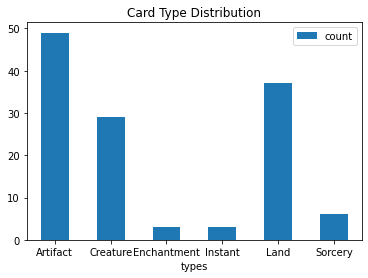

In [8]:
ax = db.plot.bar(x = 'types', rot=0)
ax.set_title('Card Type Distribution')

Text(0.5, 1.0, 'Mana Curve')

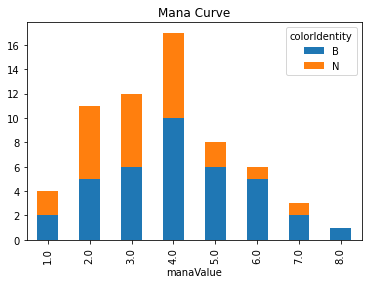

In [9]:
ax = db2.set_index('manaValue').pivot(columns = 'colorIdentity',values = 'count').plot.bar(stacked=True)
ax.set_title('Mana Curve')

Text(0.5, 1.0, 'Color Distribution')

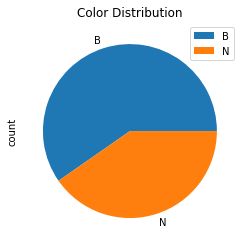

In [10]:
plot = db1.set_index('colorIdentity').plot.pie(y='count')
plot.set_title('Color Distribution')

Text(0.5, 1.0, 'Type Distribution')

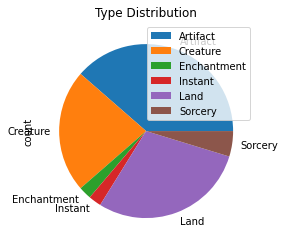

In [11]:
plot = db.set_index('types').plot.pie(y='count')
plot.set_title('Type Distribution')